In [1]:
# Install necessary packages
!pip install opencv-python numpy scikit-learn matplotlib

In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
import webcolors
from io import BytesIO
from PIL import Image
import requests

In [8]:
def preprocess_image(image_path, url=False):
    """Load and preprocess the image"""
    if url:
        response = requests.get(image_path)
        image = Image.open(BytesIO(response.content))
        image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    else:
        image = cv2.imread(image_path)

    if image is None:
        raise ValueError("Image not found or unable to load")

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize image to speed up processing
    image = cv2.resize(image, (400, 400), interpolation=cv2.INTER_AREA)

    return image

def get_dominant_colors(image, k=3):
    """Extract dominant colors using K-means clustering"""
    # Reshape the image to be a list of pixels
    pixels = image.reshape(-1, 3)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)

    # Get the cluster centers (dominant colors)
    colors = kmeans.cluster_centers_

    # Count the number of pixels in each cluster
    counts = Counter(kmeans.labels_)

    # Sort colors by frequency
    sorted_colors = sorted(zip(colors, counts.values()),
                         key=lambda x: x[1], reverse=True)

    return [color for color, count in sorted_colors]

def closest_color_name(rgb_color):
    """Find the closest color name for an RGB value"""
    min_distance = float('inf')
    closest_name = "Unknown"

    # Updated color dictionary
    color_db = {
        'red': (255, 0, 0),
        'green': (0, 128, 0),
        'blue': (0, 0, 255),
        'yellow': (255, 255, 0),
        'orange': (255, 165, 0),
        'purple': (128, 0, 128),
        'pink': (255, 192, 203),
        'brown': (165, 42, 42),
        'black': (0, 0, 0),
        'white': (255, 255, 255),
        'gray': (128, 128, 128),
        'cyan': (0, 255, 255),
        'magenta': (255, 0, 255),
        'lime': (0, 255, 0),
        'maroon': (128, 0, 0),
        'olive': (128, 128, 0),
        'navy': (0, 0, 128),
        'teal': (0, 128, 128),
        'silver': (192, 192, 192),
        'gold': (255, 215, 0)
    }

    for name, rgb in color_db.items():
        distance = sum((rgb[i] - rgb_color[i]) ** 2 for i in range(3))
        if distance < min_distance:
            min_distance = distance
            closest_name = name

    return closest_name

def display_colors(dominant_colors):
    """Display the dominant colors"""
    plt.figure(figsize=(10, 2))
    for i, color in enumerate(dominant_colors):
        plt.subplot(1, len(dominant_colors), i+1)
        plt.imshow([[color.astype(int)]])
        plt.axis('off')
        color_name = closest_color_name(color)
        plt.title(f"{color_name}\nRGB: {color.astype(int)}")
    plt.show()

In [9]:
def analyze_image(image_path, k=3, url=False):
    """Main function to analyze an image and display dominant colors"""
    try:
        # Load and preprocess the image
        image = preprocess_image(image_path, url=url)

        # Get dominant colors
        dominant_colors = get_dominant_colors(image, k=k)

        # Display the original image
        plt.figure(figsize=(5, 5))
        plt.imshow(image)
        plt.axis('off')
        plt.title("Original Image")
        plt.show()

        # Display the dominant colors
        print("\nDominant Colors:")
        display_colors(dominant_colors)

        # Return the most dominant color
        most_dominant = dominant_colors[0]
        color_name = closest_color_name(most_dominant)
        return color_name, most_dominant
    except Exception as e:
        print(f"Error processing image: {e}")
        return None, None

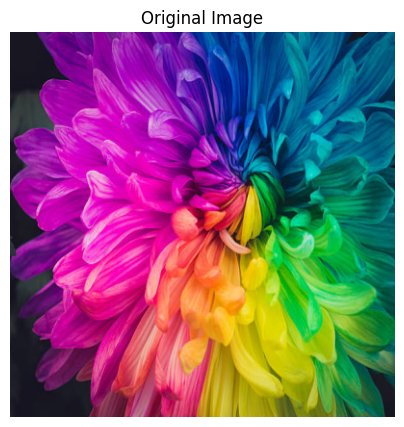


Dominant Colors:


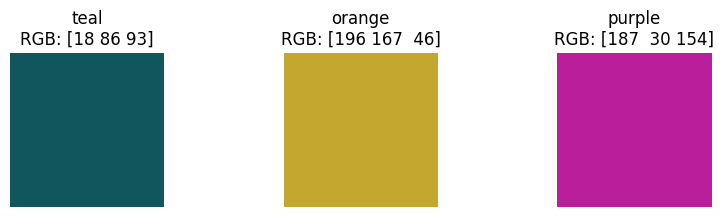


The most dominant color is: teal
RGB value: [18 86 93]


In [11]:
# Example with a local image file
color_name, rgb_value = analyze_image("/content/Test_Color.jpg", k=3)

if color_name:
    print(f"\nThe most dominant color is: {color_name}")
    print(f"RGB value: {rgb_value.astype(int)}")
else:
    print("Failed to analyze the image")

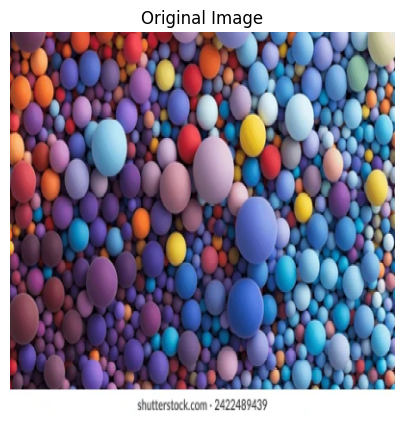


Dominant Colors:


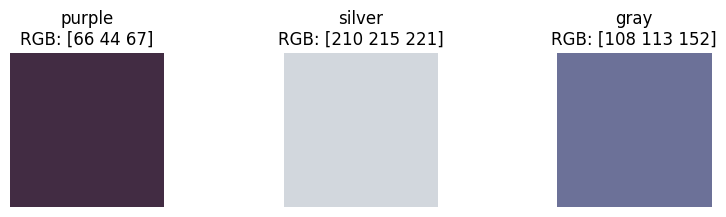


The most dominant color is: purple
RGB value: [66 44 67]


In [13]:
# Example with a local image file
color_name, rgb_value = analyze_image("/content/Test_Image2.webp", k=3)

if color_name:
    print(f"\nThe most dominant color is: {color_name}")
    print(f"RGB value: {rgb_value.astype(int)}")
else:
    print("Failed to analyze the image")